In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch

In [3]:
Path = '../input/gala-dataset/dataset/'

In [4]:
train_df = pd.read_csv(Path+'train.csv')
test_df = pd.read_csv(Path+'test.csv')

In [5]:
train_df.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [6]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# train_df['Class'] = lb.fit_transform(train_df['Class'])

In [7]:
test_df.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [8]:
# d = {0:'Attire', 1:'Decorationandsignage', 2:'Food', 3:'misc'}

In [9]:
bs = 64
SIZE = 240

tfms = get_transforms(do_flip=True,flip_vert=True,max_warp=0.,max_rotate=360.0)

In [10]:
test_data = (ImageList.from_df(df=test_df,folder='Test Images',path=Path))

train_data = (ImageList.from_df(df=train_df,folder='Train Images',path=Path)
       .split_by_rand_pct(0.1)
       .label_from_df(cols='Class')
       .transform(tfms,size=SIZE)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

In [11]:
train_data

ImageDataBunch;

Train: LabelList (5385 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
Food,misc,Attire,Food,Attire
Path: ../input/gala-dataset/dataset;

Valid: LabelList (598 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
Attire,Food,Food,misc,Attire
Path: ../input/gala-dataset/dataset;

Test: None

In [12]:
test_data

ImageList (3219 items)
Image (3, 80, 80),Image (3, 53, 80),Image (3, 80, 80),Image (3, 60, 80),Image (3, 59, 80)
Path: ../input/gala-dataset/dataset

In [13]:
train_data.add_test(test_data)

In [14]:
train_data

ImageDataBunch;

Train: LabelList (5385 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
Food,misc,Attire,Food,Attire
Path: ../input/gala-dataset/dataset;

Valid: LabelList (598 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
Attire,Food,Food,misc,Attire
Path: ../input/gala-dataset/dataset;

Test: LabelList (3219 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: EmptyLabelList
,,,,
Path: ../input/gala-dataset/dataset

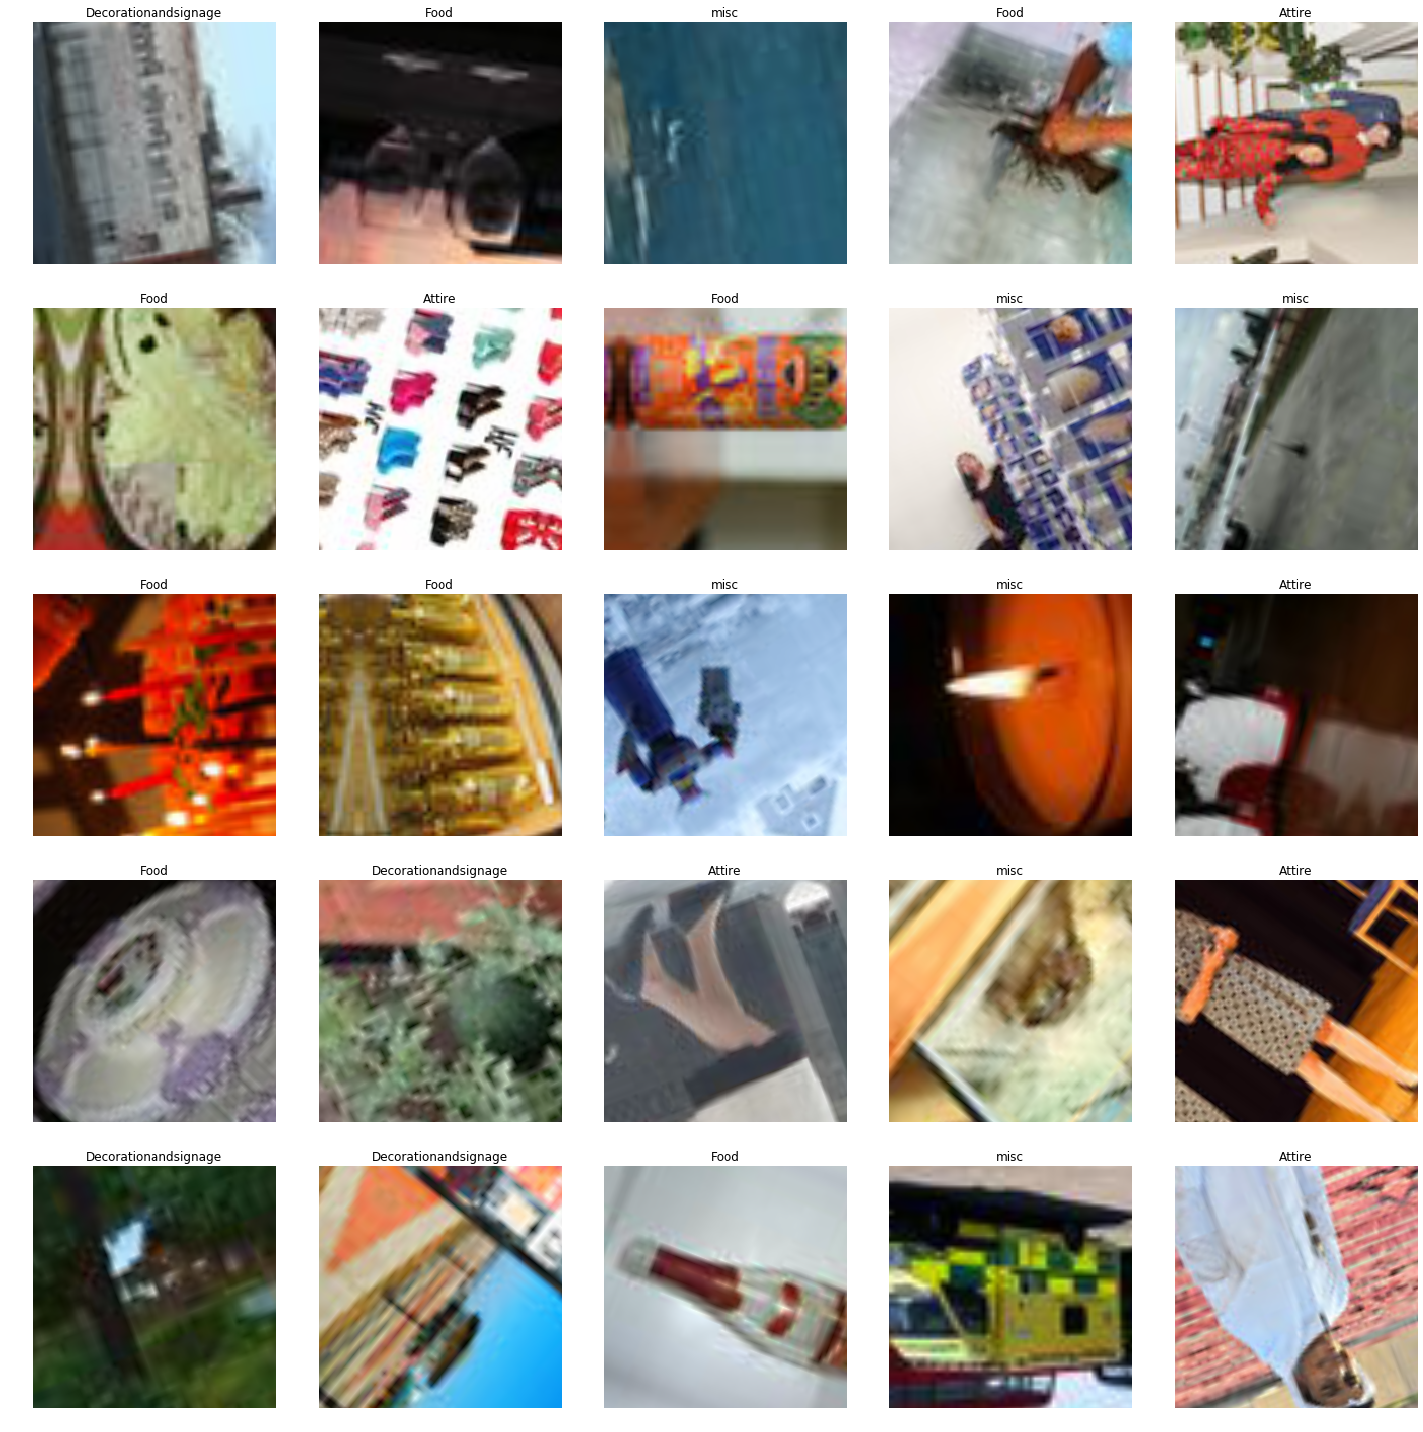

In [15]:
train_data.show_batch(rows=5,fig_size=(5,5))

In [16]:
arch = models.resnet50

In [17]:
# acc_02 = partial(accuracy_thresh, thresh=0.2)
# f_score = partial(F1, thresh=0.2, average='weighted')
from fastai.metrics import FBeta

In [18]:
learn = cnn_learner(train_data, arch, metrics=[FBeta(average='weighted')],pretrained=True,path='../working/')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-04
Min loss divided by 10: 5.75E-03


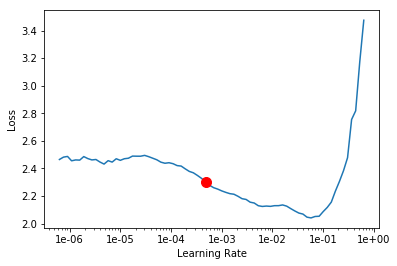

In [20]:
learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(12, 1e-03)

epoch,train_loss,valid_loss,f_beta,time
0,1.712054,0.936200,0.692047,00:44
1,1.420850,0.901385,0.707971,00:42
2,1.149002,0.769247,0.734365,00:43
3,0.974575,0.627608,0.768454,00:43
4,0.793088,0.587538,0.792465,00:42
5,0.706913,0.528566,0.821356,00:42
6,0.647621,0.508483,0.805952,00:43
7,0.604729,0.516174,0.816610,00:42
8,0.542753,0.495151,0.816060,00:41
9,0.512066,0.493648,0.817723,00:43


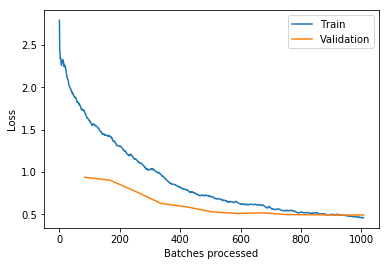

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.save('model-stage1')

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-05
Min loss divided by 10: 6.31E-08


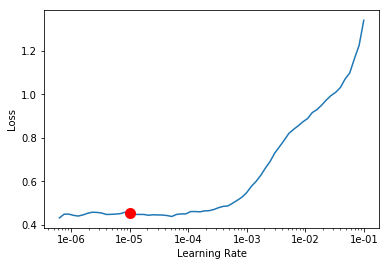

In [26]:
learn.recorder.plot(suggestion=True)

In [27]:
lr = learn.recorder.min_grad_lr
lr

9.999999999999999e-06

In [28]:
learn.fit_one_cycle(6, slice(lr, lr/10))

epoch,train_loss,valid_loss,f_beta,time
0,0.471062,0.489941,0.826411,00:46
1,0.451004,0.494851,0.811112,00:46
2,0.446063,0.491349,0.819998,00:46
3,0.460065,0.496147,0.815865,00:44
4,0.442656,0.492984,0.819175,00:46
5,0.437978,0.492196,0.821492,00:46


In [29]:
learn.save('model-stage2')

In [30]:
SIZE = 296

test_data = (ImageList.from_df(df=test_df,folder='Test Images',path=Path))

train_data = (ImageList.from_df(df=train_df,folder='Train Images',path=Path)
       .split_by_rand_pct(0.1)
       .label_from_df(cols='Class')
       .transform(tfms,size=SIZE)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

train_data.add_test(test_data)

In [31]:
learn_296 = cnn_learner(train_data, arch, metrics=[FBeta(average='weighted')],path='../working/')

In [32]:
learn_296.load('/kaggle/working/models/model-stage2')

Learner(data=ImageDataBunch;

Train: LabelList (5385 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
Food,misc,Attire,Food,Attire
Path: ../input/gala-dataset/dataset;

Valid: LabelList (598 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: CategoryList
Food,misc,Food,misc,Decorationandsignage
Path: ../input/gala-dataset/dataset;

Test: LabelList (3219 items)
x: ImageList
Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296),Image (3, 296, 296)
y: EmptyLabelList
,,,,
Path: ../input/gala-dataset/dataset, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1

In [33]:
learn_296.lr_find()

epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.63E-06


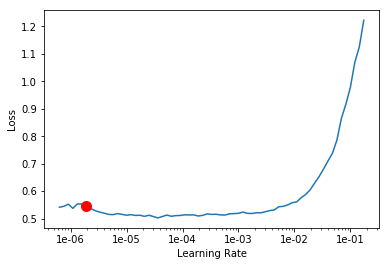

In [34]:
learn_296.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,f_beta,time
0,0.517713,0.337221,0.890689,01:02
1,0.521448,0.340052,0.885599,01:01
2,0.509872,0.334067,0.891934,01:00
3,0.517638,0.338468,0.892380,01:00
4,0.524593,0.340843,0.887221,00:59
5,0.518189,0.341584,0.890551,01:00
6,0.504148,0.339031,0.887402,00:59
7,0.527072,0.333109,0.890655,00:59
8,0.534862,0.335753,0.888934,01:00
9,0.520688,0.337956,0.888977,01:00


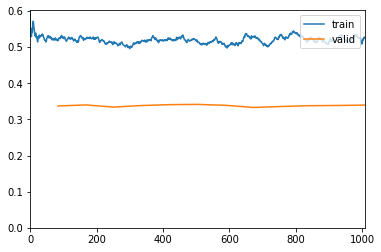

Better model found at epoch 0 with valid_loss value: 0.3372208774089813.
Better model found at epoch 2 with valid_loss value: 0.3340669274330139.
Better model found at epoch 7 with valid_loss value: 0.33310866355895996.


In [35]:
from fastai.callbacks import * 
learn_296.fit_one_cycle(12, 1e-06,callbacks=[ShowGraph(learn_296),SaveModelCallback(learn_296)])

In [36]:
learn_296.save('model_296-stage1')

In [37]:
learn_296.unfreeze()

In [38]:
learn_296.lr_find()

epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-06
Min loss divided by 10: 1.20E-06


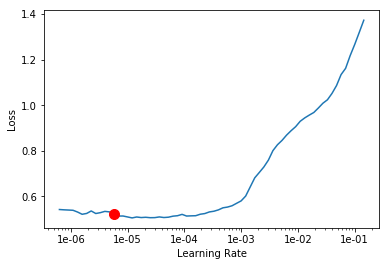

In [39]:
learn_296.recorder.plot(suggestion=True)

In [40]:
lr = learn_296.recorder.min_grad_lr
lr

5.754399373371569e-06

In [41]:
learn_296.fit_one_cycle(6, slice(lr, lr/10))

epoch,train_loss,valid_loss,f_beta,time
0,0.519665,0.336691,0.888871,01:04
1,0.520230,0.345348,0.892308,01:04
2,0.510542,0.351269,0.880572,01:04
3,0.502266,0.345357,0.883828,01:05
4,0.502155,0.347814,0.890862,01:04
5,0.494476,0.348099,0.882206,01:04


In [42]:
preds, y = learn_296.get_preds(DatasetType.Test)

In [43]:
test_df['Class'] = 0
test_df.head()

,Image,Class
0,image6245.jpg,0
1,image10409.jpg,0
2,image8692.jpg,0
3,image10517.jpg,0
4,image2580.jpg,0


In [44]:
sample_df = test_df.copy()
sample_df['Class'] = preds.argmax(1)

In [45]:
sample_df.head(20)

,Image,Class
0,image6245.jpg,2
1,image10409.jpg,2
2,image8692.jpg,2
3,image10517.jpg,2
4,image2580.jpg,0
5,image848.jpg,0
6,image1232.jpg,0
7,image8386.jpg,0
8,image9828.jpg,3
9,image9033.jpg,0


In [46]:
d = {0:'Attire', 1:'Decorationandsignage', 2:'Food', 3:'misc'}

In [47]:
sample_df.replace({"Class":d}, inplace=True)
sample_df.head()

,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,Food
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire


In [48]:
sample_df.to_csv('submission-v3-296-2.csv', index=False)

In [49]:
learn_296.save('model296-stage2')